In [1]:
from classy import Class
from pylab import *
import numpy as np
import matplotlib . pyplot as plt

In [13]:
params = {
    'H0': 67.69 , 
    'T_cmb': 2.725,
    'omega_b': 0.02245,
    'omega_cdm': 0.1197,
    'n_s': 0.9718,
    'ln10^{10}A_s': 3.0335,
    'tau_reio': 0.0508,
    'Omega_Lambda': 0.,
    'Omega_k': 0.,
    'fluid_equation_of_state': 'GO',
    'alpha_GO': 0.9652,
    'beta_GO': 0.4826,
    'gauge': 'newtonian', 
    'use_ppf': 'no',
    'k_output_values': '0.0001,0.01, 0.1',
    'evolver': 0, 
    'output': 'tCl,mPk'}

In [14]:
cosmo = Class()

In [15]:
cosmo.set(params)

True

In [16]:
cosmo.compute()

In [17]:
cosmo.raw_cl()

{'ell': array([   0,    1,    2, ..., 2498, 2499, 2500]),
 'tt': array([0.00000000e+00, 0.00000000e+00, 1.70121975e-10, ...,
        8.14043283e-18, 8.13198740e-18, 8.12395972e-18])}

In [18]:
cl=cosmo.raw_cl() 

In [19]:
cls=cl.values()

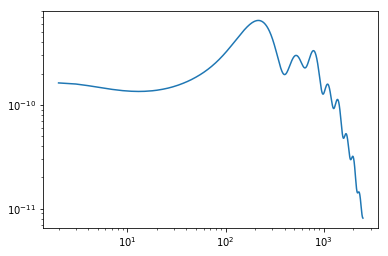

In [20]:
ell=cls[1][2:]
CL=cls[0][2:]
plot(ell,ell*(ell+1.)/2/pi*CL)
yscale('log')
xscale('log')
show()

In [76]:
datos=np.array([0,0]); 
for i in range(0,ell.size):
    datos=np.vstack([datos,np.array([ell[i],ell[i]*(ell[i]+1.)/2/pi*CL[i]]) ])
datos= datos[1:]    

In [81]:
np.savetxt('/home/miguel/class/output/mymodelGOpy_cl.dat',datos,delimiter = '    ')

In [21]:
kk = np.linspace(1.16062e-05, 1.106735430664,572) # k in h/ Mpc
Pk = [] # P(k) in ( Mpc /h) **3
h = cosmo.h() # get reduced Hubble for conversions to 1/ Mpc
for k in kk :
    Pk.append(cosmo.pk(k*h ,0.)*h **3) # function .pk(k,z)

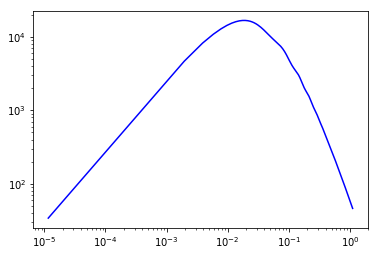

In [22]:
plt.figure(2)
plt.xscale ('log'); plt.yscale('log'); #plt.xlim(kk[0],kk[ -1])
plt.plot(kk ,Pk ,'b-')